#### About
> AutoEncoders

Autoencoders are a class of neural networks used in unsupervised learning that are designed to encode the input data into a compressed representation and then decode it back to its original form.

The architecture of an autoencoder consists of an encoder and a decoder network. The encoder network maps the input data into a lower dimensional representation, called a latent space, while the decoder network reconstructs the original input from this compressed representation.

The main objective of an autoencoder is to minimize the reconstruction error between the input and the output. This is achieved by training the network using backpropagation to adjust the weights of the neural network such that the difference between the input and output is minimized.

Autoencoders can be used for a variety of tasks such as dimensionality reduction, data compression, anomaly detection, and image denoising.

Some of the main benefits of using autoencoders include:

1. Data compression: Autoencoders can be used to reduce the size of large datasets, making them easier to store and process.

2. Feature extraction: Autoencoders can be used to learn a compact representation of the input data that captures the most important features.

3. Anomaly detection: Autoencoders can be used to detect anomalies in the data by comparing the reconstruction error of the input data with the reconstructed output.

4. Image denoising: Autoencoders can be used to remove noise from images by training the network to reconstruct clean images from noisy ones.

Overall, autoencoders are a powerful tool in deep learning that can be used to learn complex patterns in data and reduce its dimensionality.

#### 1. Data Compression

In [12]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Hyper Parameters
input_size = 784
hidden_size = 256
latent_size = 64
num_epochs = 10
batch_size = 512
learning_rate = 0.001


In [8]:
# MNIST Dataset
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())


In [9]:
# Data Loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


In [10]:
# Encoder
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, latent_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Decoder
class Decoder(nn.Module):
    def __init__(self, latent_size, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Autoencoder
class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(input_size, hidden_size, latent_size)
        self.decoder = Decoder(latent_size, hidden_size, input_size)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [11]:
# Model
autoencoder = Autoencoder(input_size, hidden_size, latent_size)

# Loss function
criterion = nn.MSELoss()

# Optimizer
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Train the Model
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        # Flatten the image
        images = images.view(-1, 28*28)
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                  % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.item()))

# Test the Model
autoencoder.eval()
with torch.no_grad():
    total_loss = 0
    for images, _ in test_loader:
        # Flatten the image
        images = images.view(-1, 28*28)
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        total_loss += loss.item()

    print('Test Loss: %.4f' % (total_loss/len(test_loader)))

# Save the Model
torch.save(autoencoder.state_dict(), 'autoencoder.pth')

Epoch [1/10], Step [100/117], Loss: 0.0525
Epoch [2/10], Step [100/117], Loss: 0.0295
Epoch [3/10], Step [100/117], Loss: 0.0201
Epoch [4/10], Step [100/117], Loss: 0.0155
Epoch [5/10], Step [100/117], Loss: 0.0143
Epoch [6/10], Step [100/117], Loss: 0.0124
Epoch [7/10], Step [100/117], Loss: 0.0111
Epoch [8/10], Step [100/117], Loss: 0.0097
Epoch [9/10], Step [100/117], Loss: 0.0093
Epoch [10/10], Step [100/117], Loss: 0.0086
Test Loss: 0.0082


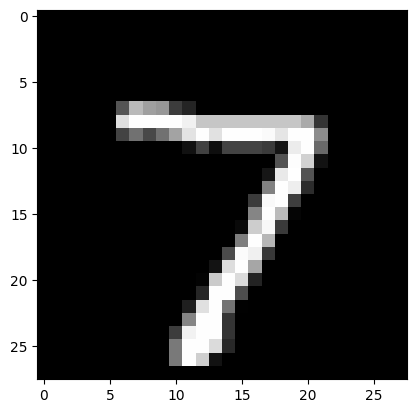

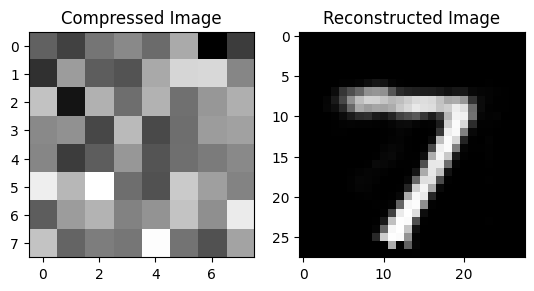

In [13]:
#Evaluation
# Load the Model
autoencoder = Autoencoder(input_size, hidden_size, latent_size)
autoencoder.load_state_dict(torch.load('autoencoder.pth'))

# Test on a Sample Image
sample_image, _ = test_dataset[0]
plt.imshow(sample_image.numpy()[0], cmap='gray')
plt.show()

# Compress the Sample Image
sample_image = sample_image.view(-1, 28*28)
compressed_image = autoencoder.encoder(sample_image)
compressed_image = compressed_image.detach().numpy()

# Reconstruct the Sample Image
reconstructed_image = autoencoder.decoder(torch.Tensor(compressed_image))
reconstructed_image = reconstructed_image.detach().numpy()

# Plot the Results
plt.subplot(1, 2, 1)
plt.imshow(np.reshape(compressed_image, (8, 8)), cmap='gray')
plt.title('Compressed Image')
plt.subplot(1, 2, 2)
plt.imshow(np.reshape(reconstructed_image, (28, 28)), cmap='gray')
plt.title('Reconstructed Image')
plt.show()


#### 2. Feature Extraction

In [15]:
# Extract Features
features_train = []
labels_train = []
features_test = []
labels_test = []
for images, labels in train_loader:
    # Flatten the image
    images = images.view(-1, 28*28)
    # Pass through encoder to extract features
    features = autoencoder.encoder(images).detach().numpy()
    # Append features and labels to lists
    features_train.append(features)
    labels_train.append(labels.numpy())
features_train = np.concatenate(features_train, axis=0)
labels_train = np.concatenate(labels_train, axis=0)

for images, labels in test_loader:
    # Flatten the image
    images = images.view(-1, 28*28)
    # Pass through encoder to extract features
    features = autoencoder.encoder(images).detach().numpy()
    # Append features and labels to lists
    features_test.append(features)
    labels_test.append(labels.numpy())
features_test = np.concatenate(features_test, axis=0)
labels_test = np.concatenate(labels_test, axis=0)

# Save Features and Labels
np.save('features_train.npy', features_train)
np.save('labels_train.npy', labels_train)
np.save('features_test.npy', features_test)
np.save('labels_test.npy', labels_test)

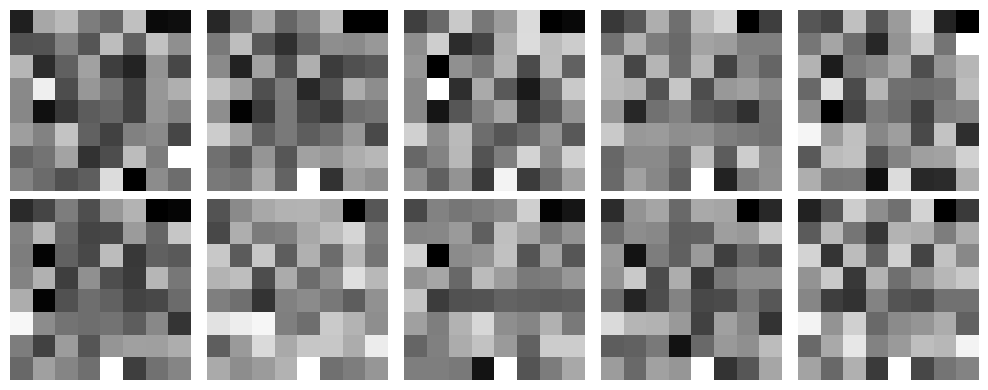

In [17]:
#visualizing few features
# Load Features
features = np.load('features_train.npy')

# Plot Features
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
axs = axs.flatten()
for i in range(10):
    axs[i].imshow(features[i].reshape(8, 8), cmap='gray')
    axs[i].axis('off')
plt.tight_layout()
plt.show()